# Sample Sales Data - EDA, Data Preparation

_ | Details
--- | ---
Tasks | Perform EDA on [Sample Sales Data](https://www.kaggle.com/kyanyoga/sample-sales-data?select=sales_data_sample.csv)<br>Perform Data Preparation, such as missing value mitigation, feature selection, one-hot encoding, and categorical encoding.
Owner | kyanyoga
ID | kyanyoga/sample-sales-data
Subtitle | Denormalize Sales Data : Segmentation, Clustering, Shipping, etc.
Description | Sample Sales Data, Order Info, Sales, Customer, Shipping, etc., Used for Segmentation, Customer Analytics, Clustering and More.  Inspired for retail analytics.  This was originally used for Pentaho DI Kettle, But I found the set could be useful for Sales Simulation training. <br><br>Originally Written by María Carina Roldán, Pentaho Community Member, BI consultant (Assert Solutions), Argentina. This work is licensed under the Creative Commons Attribution-Noncommercial-Share Alike 3.0 Unported License.  Modified by Gus Segura June 2014.
License | CC0-1.0

**SETUP**

In [ ]:
# !kaggle datasets download -q kyanyoga/sample-sales-data --unzip -f sales_data_sample.csv

In [ ]:
# !kaggle datasets metadata kyanyoga/sample-sales-data

In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
# with open('dataset-metadata.json') as metadata:
#     dataset_metadata = json.load(metadata)

In [5]:
filename = 'sales_data_sample.csv'

In [6]:
df = pd.read_csv(filename)

In [7]:
sns.set_theme()

## Initial Dataset Inspections

In [8]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Identifying dataframe details

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### Inspecting variables

In [10]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [11]:
df.describe(include=['O'])

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823,2823,2823,2823,2823,2823,2823,302,2823,1337,2747,2823,1749,2823,2791,2823
unique,252,6,7,109,92,91,92,9,73,16,73,19,3,77,71,3
top,11/14/2003 0:00,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,38,2617,967,52,259,259,259,55,304,416,259,1004,1407,259,259,1384


**`MSRP` $\neq$ `PRICEEACH`**

These variables vary by order and therefore will need further inspection

In [12]:
df['PRICE_VAR'] = df.MSRP - df.PRICEEACH

**Checking Unique Values in `PRODUCTLINE`**

In [13]:
print(df.PRODUCTLINE.nunique())
df.PRODUCTLINE.value_counts()

7


Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [14]:
df[['DEALSIZE', 'PRODUCTLINE', 'PRICEEACH']].groupby(['DEALSIZE', 'PRODUCTLINE'], as_index=True).mean()

PRICEEACH
DEALSIZE PRODUCTLINE                 
Large    Classic Cars       99.874021
         Motorcycles       100.000000
         Planes             97.861111
         Trains            100.000000
         Trucks and Buses  100.000000
         Vintage Cars      100.000000
Medium   Classic Cars       97.015604
         Motorcycles        95.178205
         Planes             90.917674
         Ships              91.541121
         Trains             92.251154
         Trucks and Buses   98.453257
         Vintage Cars       94.112835
Small    Classic Cars       68.669559
         Motorcycles        68.746090
         Planes             73.830893
         Ships              77.380157
         Trains             66.537600
         Trucks and Buses   70.727647
         Vintage Cars       63.579224

### Dataset date coverage

In [15]:
df.YEAR_ID.value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

Converting `ORDERDATE` from str type to datetime type

In [16]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [17]:
df.sort_values(by='ORDERDATE', inplace=True)

Adding a date formatted column useful for time-series analysis

In [18]:
def add_zeros(item: str) -> str:
    nums = item.split(":")
    formatted_item = ":".join(f"{int(num):02d}" for num in nums)
    return formatted_item


df['d1'] = '01'
df['YM_ID'] = pd.concat([df.YEAR_ID.astype('string') + '-' + df.MONTH_ID.astype('string').apply(add_zeros) + '-' + df.d1], join='inner', axis=1)

Dropping the column we used to format `YM_ID`

In [19]:
df.drop(columns='d1', inplace=True)

In [20]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PRICE_VAR,YM_ID
578,10100,30,100.0,3,5151.0,2003-01-06,Shipped,1,1,2003,...,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,70.0,2003-01-01
680,10100,50,67.8,2,3390.0,2003-01-06,Shipped,1,1,2003,...,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,-7.8,2003-01-01


## Dataset caveats

Inspecting caveats in the dataset

In [21]:
# sns.axes_style()

In [22]:
# sns.set_context({})

### Sales Trend

In [23]:
trend_df = df[['YM_ID', 'SALES']].groupby('YM_ID', as_index=False).sum()
trend_df.rename(columns={'SALES': 'TOTAL_SALES'}, inplace=True)
trend_df['AVG_SALES'] = df.groupby('YM_ID', as_index=False).mean().SALES
trend_df.head()

,YM_ID,TOTAL_SALES,AVG_SALES
0,2003-01-01,129753.60,3327.015385
1,2003-02-01,140836.19,3435.029024
2,2003-03-01,174504.90,3490.098000
3,2003-04-01,201609.55,3476.026724
4,2003-05-01,192673.11,3321.950172


In [24]:
# Calculate Long-Format DataFrame

In [25]:
# new_df = df[['YM_ID']].groupby('YM_ID').count()
# new_df.reset_index(inplace=True)
# new_df.reset_index(inplace=True)
# new_df['s1'] = df[['YEAR_ID', 'MONTH_ID', 'SALES']].groupby(['YEAR_ID', 'MONTH_ID'], as_index=False).sum().to_numpy()[:, 2]
# new_df['s2'] = df[['YEAR_ID', 'MONTH_ID', 'SALES']].groupby(['YEAR_ID', 'MONTH_ID'], as_index=False).mean().to_numpy()[:, 2]
# new_df['s3'] = df[['YEAR_ID', 'MONTH_ID', 'SALES']].groupby(['YEAR_ID', 'MONTH_ID'], as_index=False).std().to_numpy()[:, 2]
# # new_df
# long_df = pd.wide_to_long(new_df, 's', i='index', j='YM_ID')
# long_df.rename(columns={'YM_ID': 'YM', 's': 'amount'}, inplace=True)
# long_df.reset_index(inplace=True)
# long_df.rename(columns={'YM_ID': 'variable_type'}, inplace=True)
# long_df.variable_type.replace(to_replace=1, value='total_sales', inplace=True)
# long_df.variable_type.replace(to_replace=2, value='avg_sales', inplace=True)
# long_df.variable_type.replace(to_replace=3, value='std', inplace=True)
# long_df.drop('index', axis=1, inplace=True)
# long_df.head(2)

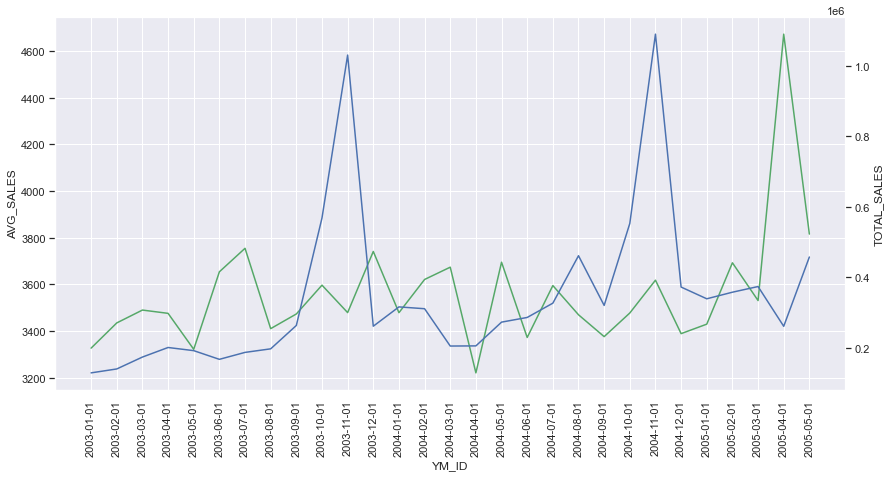

In [26]:
g = sns.relplot(data=trend_df, x='YM_ID', y='AVG_SALES', color="g",
                kind="line", height=6, aspect=2)
ax2 = plt.twinx()
ax2.grid(b=None)
sns.lineplot(data=trend_df, x='YM_ID', y='TOTAL_SALES', color="b", ax=ax2)
g.set_xticklabels(rotation=90, step=1)
plt.show()

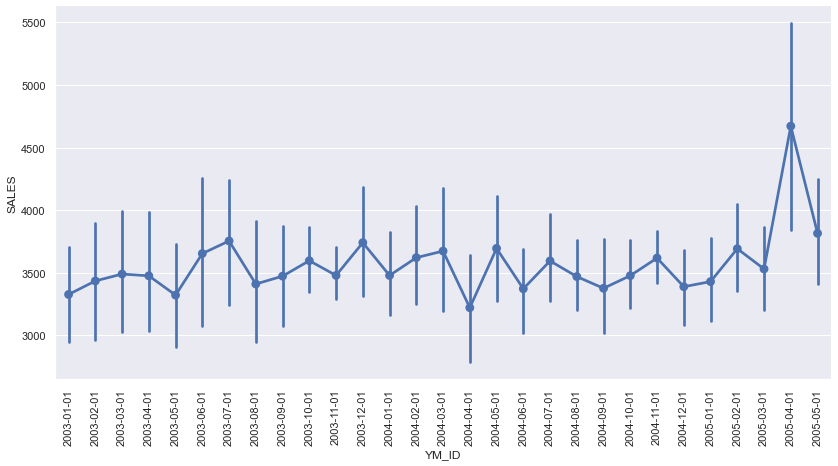

In [27]:
g = sns.catplot(
    data=df, x="YM_ID", y="SALES",
    # hue="DEALSIZE",
    # col_wrap=2, hue="event", style="event",
    kind="point", height=6, aspect=2
)
g.set_xticklabels(rotation=90, step=1)
plt.show()

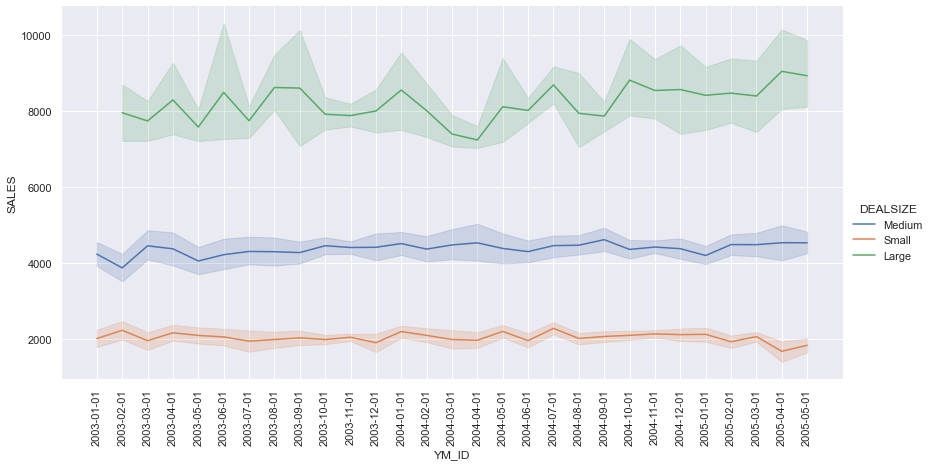

In [28]:
g = sns.relplot(data=df, x='YM_ID', y='SALES', hue='DEALSIZE',
                kind="line", height=6, aspect=2)
g.set_xticklabels(rotation=90, step=1)
plt.show()

### DEALSIZE vs MSRP

MSRP for DEALSIZE=Large have variation post 2004-10
> Which is mostly caused by MSRP changes from Vintage and Classic cars having a larger sales volume than the other PRODUCTLINEs

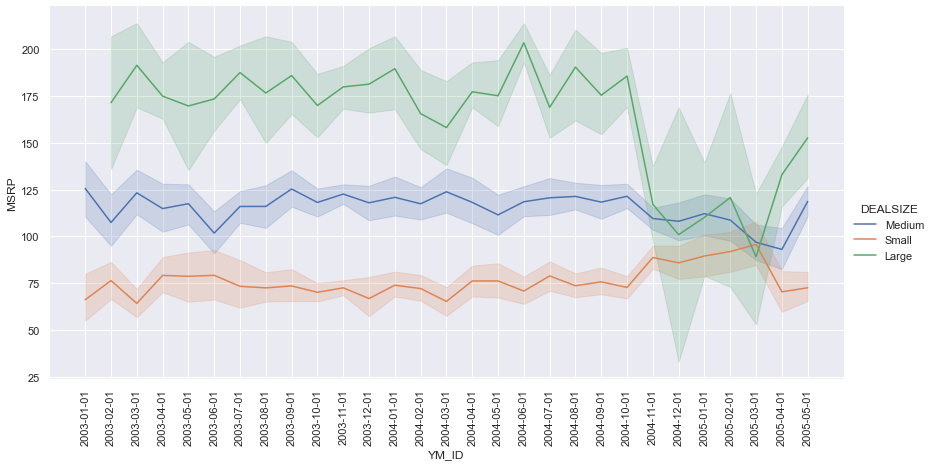

In [29]:
g = sns.relplot(
    data=df, x="YM_ID", y="MSRP",
    hue="DEALSIZE",  # hue="event", style="event",
    kind="line", height=6, aspect=2)
g.set_xticklabels(rotation=90, step=1)
plt.show()

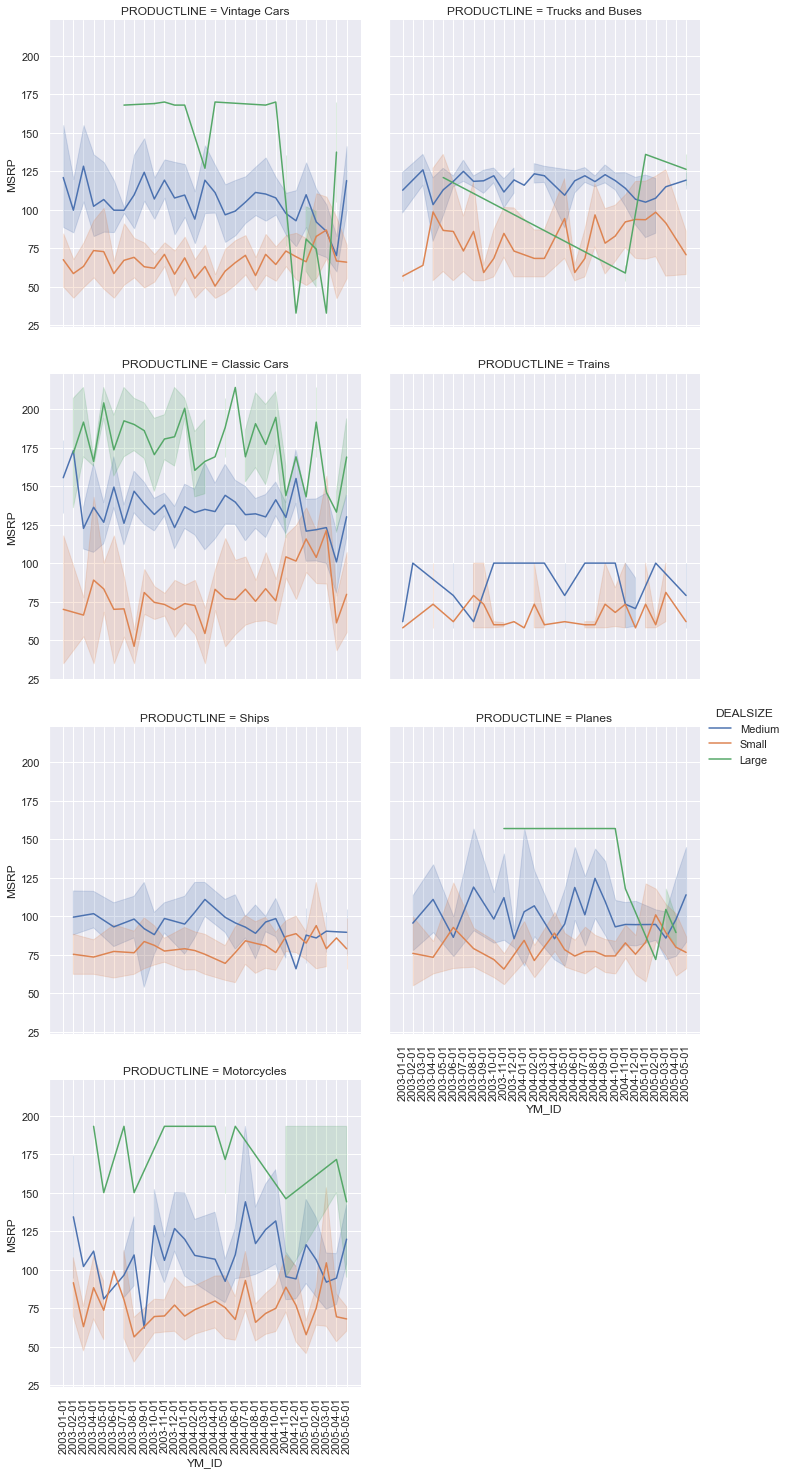

In [30]:
g = sns.relplot(
    data=df, x="YM_ID", y="MSRP",
    hue="DEALSIZE", col="PRODUCTLINE", col_wrap=2,
    kind="line", aspect=1
)
g.set_xticklabels(rotation=90, step=1)
plt.show()

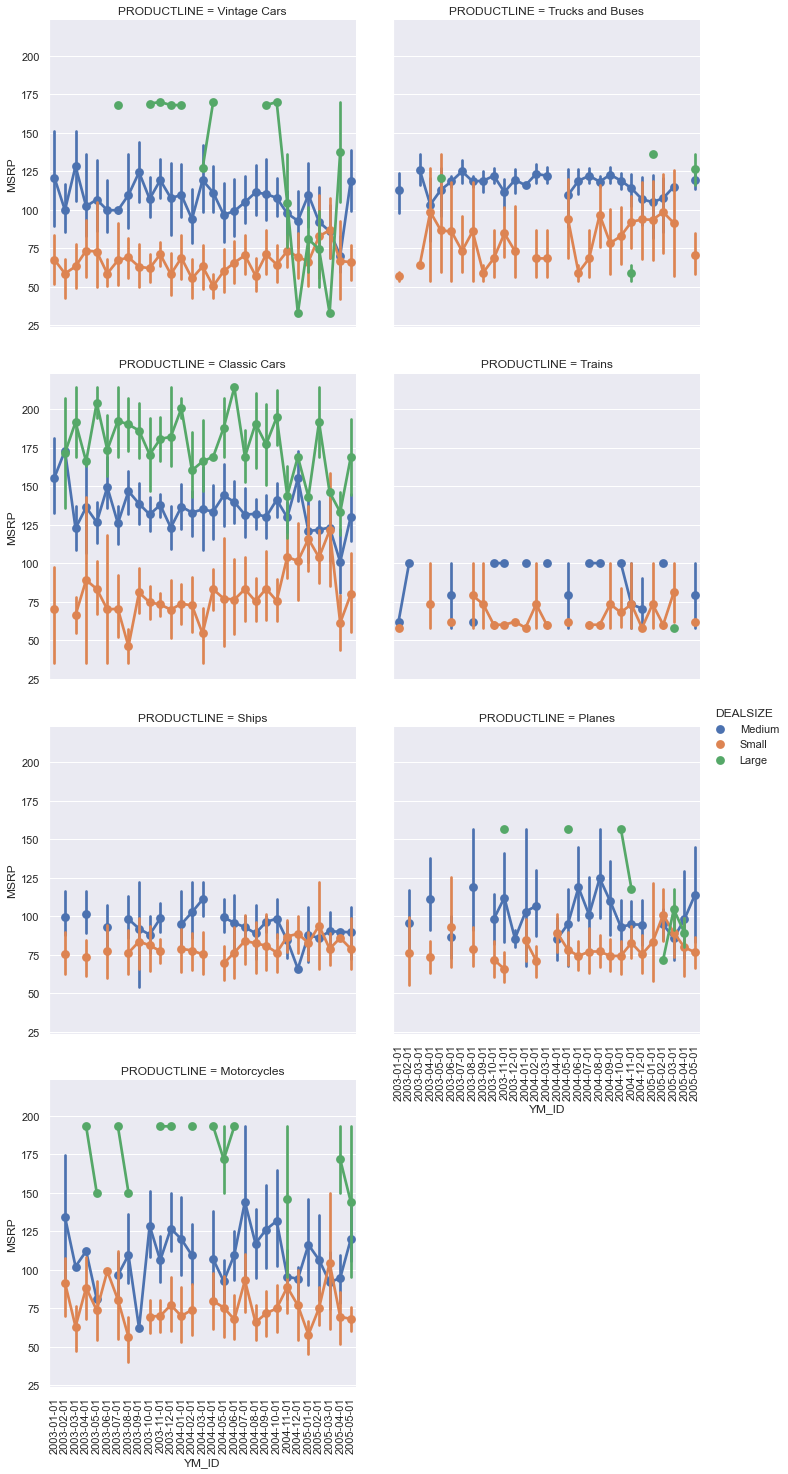

In [31]:
g = sns.catplot(
    data=df, x="YM_ID", y="MSRP",
    hue="DEALSIZE", col="PRODUCTLINE", col_wrap=2,
    kind="point", aspect=1
)
g.set_xticklabels(rotation=90, step=1)
plt.show()

### DEALSIZE vs PRICEEACH

* DEALSIZE: Large typically remain at a constant level
* DEALSIZE: Small varies more than Medium deals

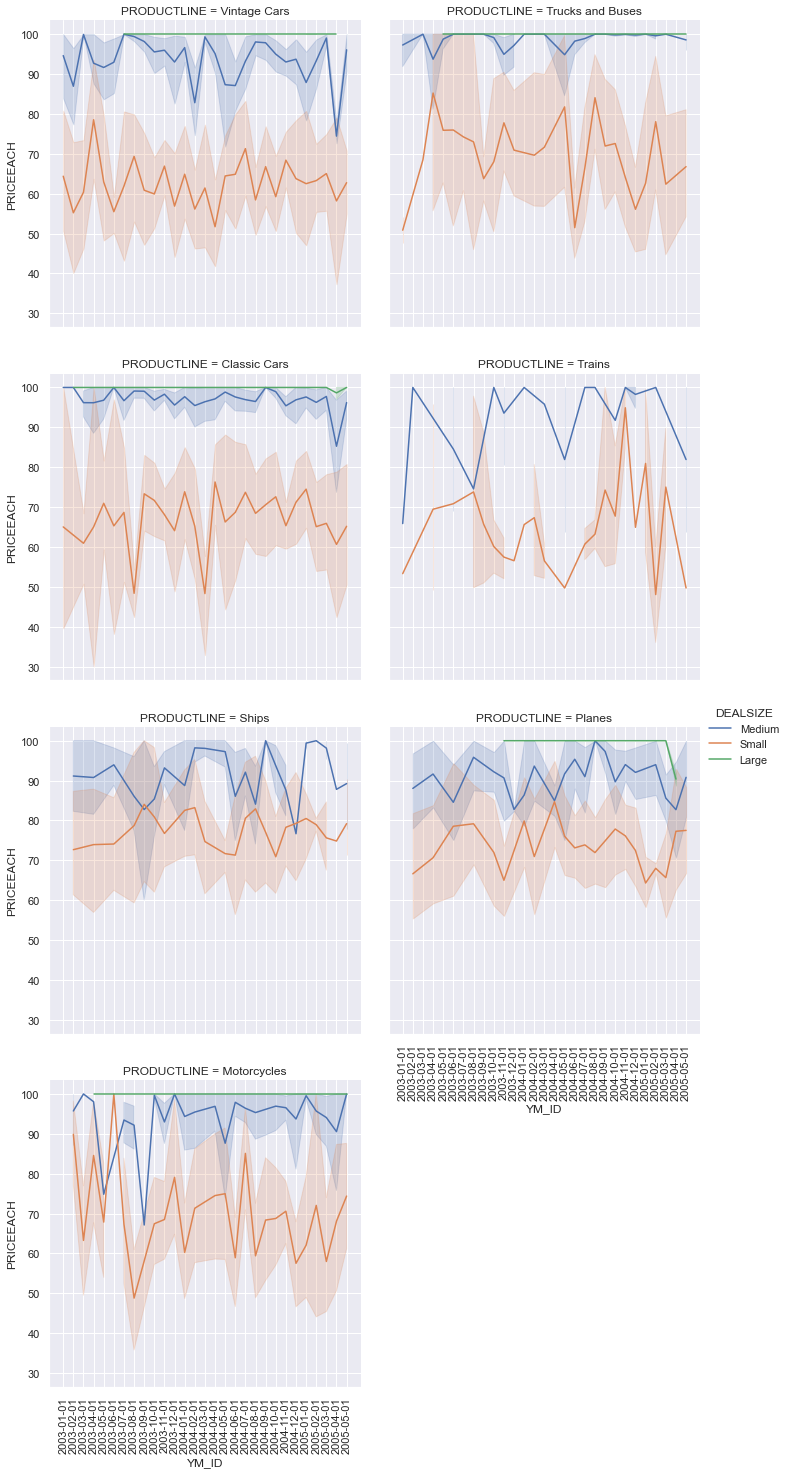

In [32]:
g = sns.relplot(
    data=df, x="YM_ID", y="PRICEEACH",
    hue="DEALSIZE", col="PRODUCTLINE", col_wrap=2,
    kind="line", aspect=1
)
g.set_xticklabels(rotation=90, step=1)
plt.show()

## Identifying & Data Preparation

In [33]:
df.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRICE_VAR
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280,-0.011577
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881,0.019834
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625,0.221666
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067,-0.013860
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239,0.400941
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234,0.007704
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170,0.007340
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310,-0.014892
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000,0.871998
PRICE_VAR,-0.011577,0.019834,0.221666,-0.013860,0.400941,0.007704,0.007340,-0.014892,0.871998,1.000000


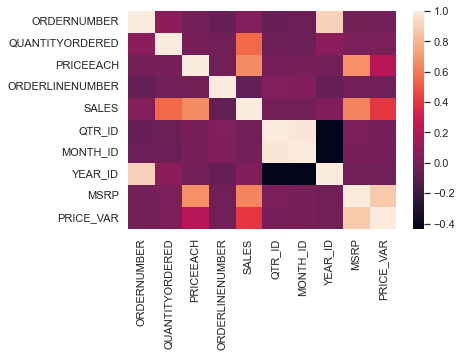

In [34]:
sns.heatmap(df.corr())
plt.show()

In [35]:
# checking for null values
pd.concat([df.isnull().sum().to_frame().rename(columns={0: 'missing'}), (df.isnull().sum() / len(df))], axis=1).rename(columns={0: 'missing%'}).sort_values('missing%', ascending=False).transpose()

,ADDRESSLINE2,STATE,TERRITORY,POSTALCODE,CONTACTFIRSTNAME,ORDERNUMBER,PHONE,PRICE_VAR,DEALSIZE,CONTACTLASTNAME,...,PRODUCTLINE,YEAR_ID,MONTH_ID,QTR_ID,STATUS,ORDERDATE,SALES,ORDERLINENUMBER,PRICEEACH,YM_ID
missing,2521.000000,1486.00000,1074.000000,76.000000,32.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missing%,0.893022,0.52639,0.380446,0.026922,0.011335,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# checking for null values
df.isnull().sum()[df.isnull().sum().values > 0]

ADDRESSLINE2        2521
STATE               1486
POSTALCODE            76
TERRITORY           1074
CONTACTFIRSTNAME      32
dtype: int64

Dropping features/columns:
* Dropping the following columns since these have a lot of missing values: `ADDRESSLINE1`, `ADDRESSLINE2`, `STATE`, `POSTALCODE`, `TERRITORY`
* Dropping the following columns since these are unnecessary or are related to customers' personal information: `CITY`, `PHONE`, `CONTACTFIRSTNAME`, `CONTACTLASTNAME`, `CUSTOMERNAME`
* Dropping these columns since these are auto-generated by the retail system, and will not be necessary for the clustering algorithm: `ORDERNUMBER`, `ORDERLINENUMBER`
* Dropping `QTR_ID` as its correlation with `MONTH_ID` is high ($\approx$1) which means `QTR_ID` will produce nearly same results as `MONTH_ID`
* Dropping `ORDERDATE`, and identify datetime by month and year.

In [37]:
# since there are lot of Null values in 'addressline2', 'state', 'postal code' and 'territory' we can drop them.
# Country & City would represent the order grographical information.
# Also we can drop city, address1, phone number, contact_name, contact last_name and contact first_name since they are not required for the analysis

dropcols = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY',
            'CITY', 'PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME',
            'ORDERNUMBER', 'ORDERLINENUMBER', 'QTR_ID', 'ORDERDATE']
df = df.drop(dropcols, axis=1)

In [38]:
df.head(2)

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,PRICE_VAR,YM_ID
578,30,100.0,5151.0,Shipped,1,2003,Vintage Cars,170,S18_1749,USA,Medium,70.0,2003-01-01
680,50,67.8,3390.0,Shipped,1,2003,Vintage Cars,60,S18_2248,USA,Medium,-7.8,2003-01-01


### Inspecting Initial Relationships (numeric)

Notes:
* Seasons (e.g., year, month) have little to no correlation with sales
* Inspect variables: QUANTITYORDERED, PRICEEACH, MSRP, PRICE_VAR
* Appearance of relationship between `DEALSIZE` and `PRICE_VAR`
  * Where `PRICE_VAR = MSRP - PRICEEACH`
  * Does `PRICE_VAR` $\propto$ `SALES`?
    * I.e., as `PRICE_VAR` increases, which is caused by the sellers reducing the item price (i.e., discounts reducing `PRICEEACH`), does SALES increase?

In [39]:
corr_df = df[['SALES', 'MSRP', 'QUANTITYORDERED', 'PRICEEACH', 'PRICE_VAR']].corr()
corr_df.SALES

SALES              1.000000
MSRP               0.635239
QUANTITYORDERED    0.551426
PRICEEACH          0.657841
PRICE_VAR          0.400941
Name: SALES, dtype: float64

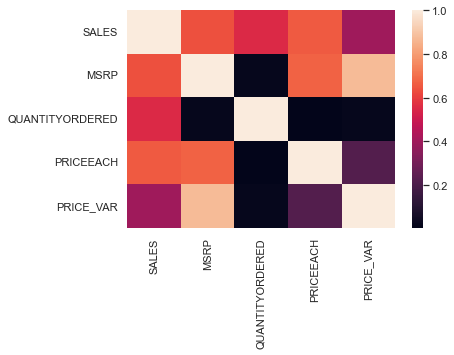

In [40]:
sns.heatmap(corr_df)
plt.show()

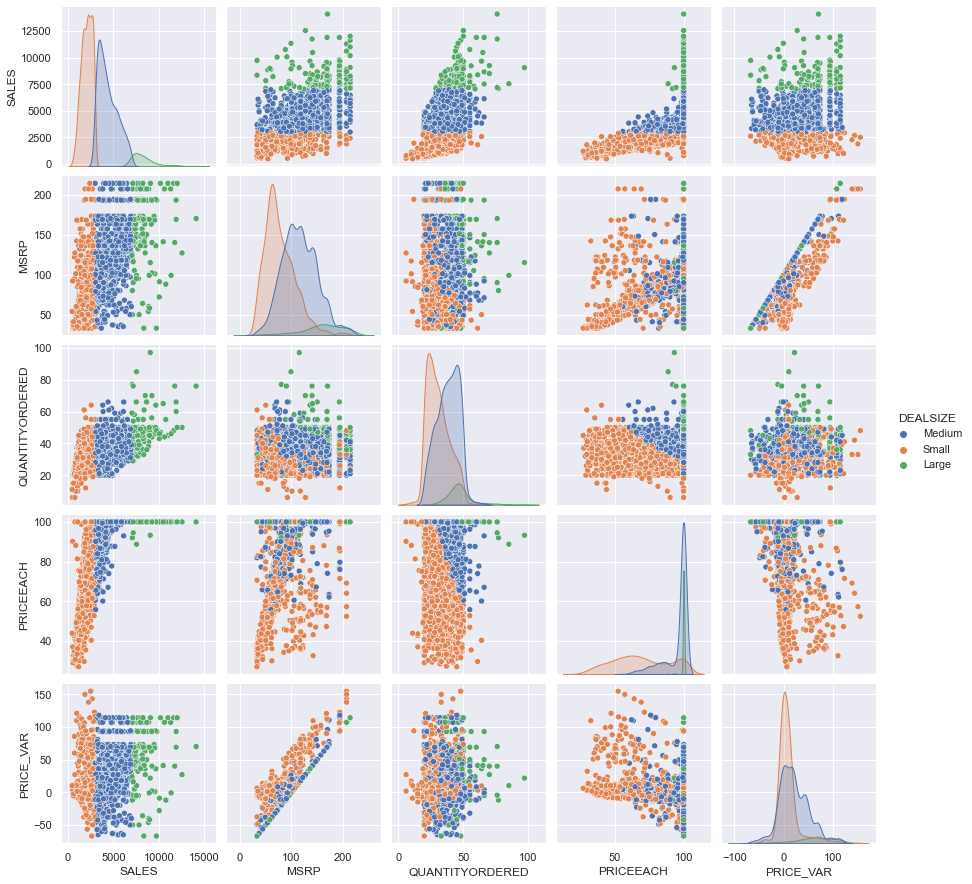

In [41]:
sns.pairplot(data=df[['SALES', 'MSRP', 'QUANTITYORDERED', 'PRICEEACH', 'PRICE_VAR', 'DEALSIZE']], hue="DEALSIZE")
plt.show()

#### MSRP

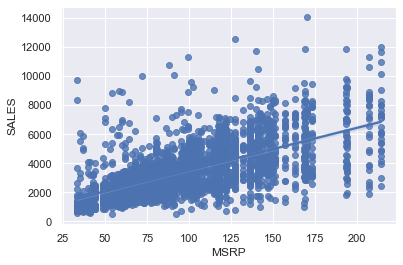

In [42]:
sns.regplot(x='MSRP', y='SALES', data=df)
plt.show()

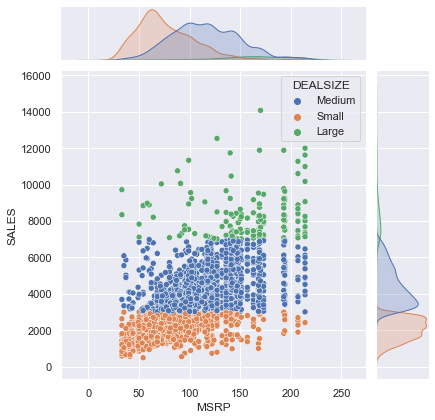

In [43]:
sns.jointplot(x='MSRP', y='SALES', data=df, hue='DEALSIZE')
plt.show()

#### PRICEEACH

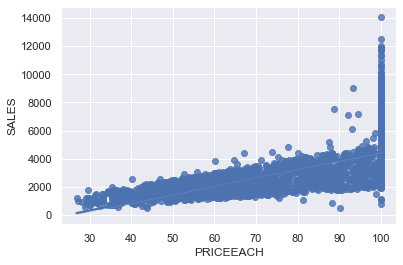

In [44]:
sns.regplot(x='PRICEEACH', y='SALES', data=df)
plt.show()

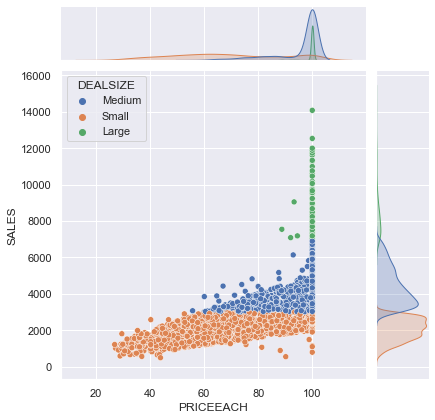

In [45]:
sns.jointplot(x='PRICEEACH', y='SALES', data=df, hue='DEALSIZE')
plt.show()

#### PRICE_VAR

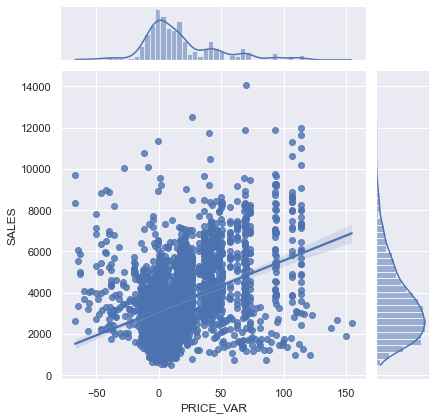

In [46]:
sns.jointplot(data=df, x="PRICE_VAR", y="SALES", kind='reg')
plt.show()

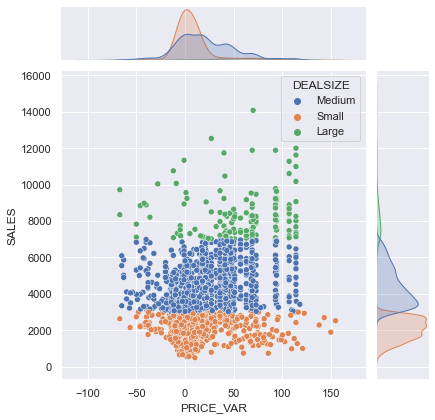

In [47]:
sns.jointplot(data=df, x="PRICE_VAR", y="SALES", hue="DEALSIZE")
plt.show()

Inspecting `PRICE_VAR` relationships with the following:
* `DEALSIZE`
  * Large `DEALSIZE`: it appears that the variation between `PRICEEACH` (i.e., selling price at the time of the sale) and `MSRP` matters for most customers
  * Medium & Small `DEALSIZE`: it appears that for these deals, a smaller variation between `PRICEEACH` and `MSRP` results to a sale
* `QUANTITYORDERED` and `DEALSIZE`: `DEALSIZE` appears to be well distributed within `PRICE_VAR`

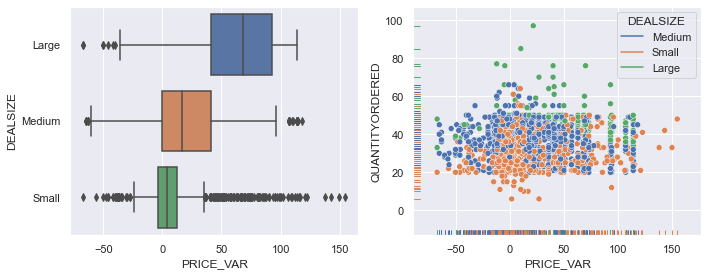

In [48]:
f, axs = plt.subplots(1, 2, figsize=(10, 4),
                      # gridspec_kw=dict(width_ratios=[4, 4])
                      )
sns.boxplot(x='PRICE_VAR', y='DEALSIZE', order=['Large', 'Medium', 'Small'], data=df,
            ax=axs[0])
sns.scatterplot(x='PRICE_VAR', y='QUANTITYORDERED', hue='DEALSIZE', data=df,
                ax=axs[1])
sns.rugplot(data=df, x='PRICE_VAR', y='QUANTITYORDERED', hue='DEALSIZE', ax=axs[1])
f.tight_layout()

#### QUANTITYORDERED

In [49]:
df[['SALES', 'QUANTITYORDERED']].corr()['SALES']

SALES              1.000000
QUANTITYORDERED    0.551426
Name: SALES, dtype: float64

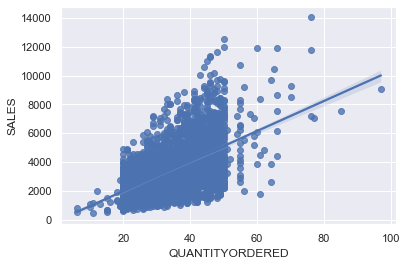

In [50]:
sns.regplot(y='SALES', x='QUANTITYORDERED', data=df)
plt.show()

Inspecting `QUANTITYORDERED` relationships with other variables:
* `DEALSIZE` - it appears that `QUANTITYORDERED` changes with `DEALSIZE`
* `PRICE_VAR` - it appears that `QUANTITYORDERED` remains constant as `PRICE_VAR` increases

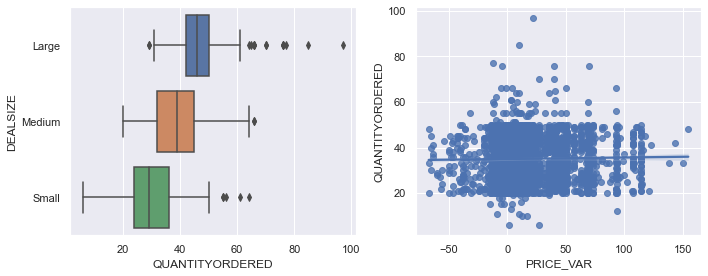

In [51]:
f, axs = plt.subplots(1, 2, figsize=(10, 4),
                      # gridspec_kw=dict(width_ratios=[4, 4])
                      )
sns.boxplot(x='QUANTITYORDERED', y='DEALSIZE', order=['Large', 'Medium', 'Small'], data=df, ax=axs[0])
sns.regplot(x='PRICE_VAR', y='QUANTITYORDERED', data=df, ax=axs[1])
f.tight_layout()

In [52]:
corr_df.PRICE_VAR

SALES              0.400941
MSRP               0.871998
QUANTITYORDERED    0.019834
PRICEEACH          0.221666
PRICE_VAR          1.000000
Name: PRICE_VAR, dtype: float64

### Inspecting Categorical Features

#### DEALSIZE

While `DEALSIZE` appears to have a relationship between `SALES`, `PRICE_VAR`, and `QUANTITYORDERED`, its relationship with `SALES` appears to be positively stronger.

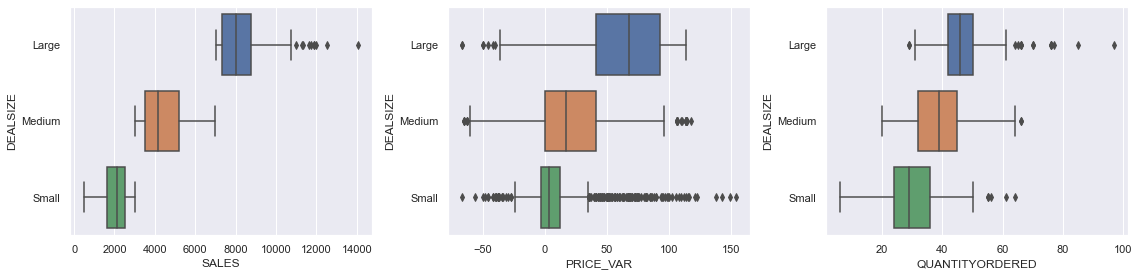

In [53]:
f, axs = plt.subplots(1, 3, figsize=(16, 4),
                      # gridspec_kw=dict(width_ratios=[4, 4])
                      )
sns.boxplot(x='SALES', y='DEALSIZE', order=['Large', 'Medium', 'Small'], data=df,
            ax=axs[0])
sns.boxplot(x='PRICE_VAR', y='DEALSIZE', order=['Large', 'Medium', 'Small'], data=df,
            ax=axs[1])
sns.boxplot(y='DEALSIZE', x='QUANTITYORDERED', order=['Large', 'Medium', 'Small'], data=df,
            ax=axs[2])
f.tight_layout()

#### PRODUCTLINE

Inspecting `PRODUCTLINE` distribution
> Based on the histogram and boxplot below, the productlines Classic Cars, Vintage Cars, Motorcycles, and Trucks and Buses contribute to most of the sales

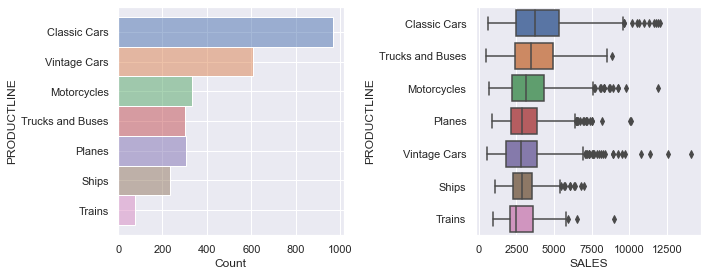

In [54]:
# Categorize PRODUCTLINE in order to apply an order in the histogram
# df is ordered by PRODUCTLINE sum
df['PRODUCTLINE'] = pd.Categorical(df['PRODUCTLINE'], df.groupby('PRODUCTLINE').sum()[['SALES']].sort_values('SALES', ascending=False).index)

f, axs = plt.subplots(1, 2, figsize=(10, 4),
                      # gridspec_kw=dict(width_ratios=[4, 4])
                      )
sns.histplot(y='PRODUCTLINE', hue='PRODUCTLINE', data=df, legend=False,
             ax=axs[0])
sns.boxplot(y='PRODUCTLINE', x='SALES', data=df,
            # Order boxes by mean
            order=df.groupby('PRODUCTLINE').mean()[['SALES']].sort_values('SALES', ascending=False).index,
            ax=axs[1])

# Undo the categorical type of PRODUCTLINE
df.PRODUCTLINE = df.PRODUCTLINE.astype('O')
# Reset the order of df
df.sort_index(inplace=True)

f.tight_layout()

In [55]:
# g = sns.catplot(y='PRODUCTLINE', data=df, kind='count',
#                 # Order boxes by mean
#                 order=df.groupby('PRODUCTLINE').sum()[['SALES']].sort_values('SALES', ascending=False).index,
#                 aspect=1.4)
# g.set_xticklabels(rotation=90, step=1)
# plt.show()

In [56]:
# g = sns.catplot(y='PRODUCTLINE', x='SALES', data=df, kind='box',
#                 # Order boxes by mean
#                 order=df.groupby('PRODUCTLINE').mean()[['SALES']].sort_values('SALES', ascending=False).index,
#                 aspect=1.4)
# g.set_xticklabels(rotation=90, step=1)
# plt.show()

`PRODUCTCODE` unique values = 109, one-hot encoding will introduce 109 columns. Using categorical encoding for this reason.

In [57]:
pd.Categorical(df['PRODUCTCODE']).codes

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [58]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

#### Distributions by Geography

Sales distribution by Country

In [59]:
order_list = df.COUNTRY.value_counts()
order_list[:5]

USA          1004
Spain         342
France        314
Australia     185
UK            144
Name: COUNTRY, dtype: int64

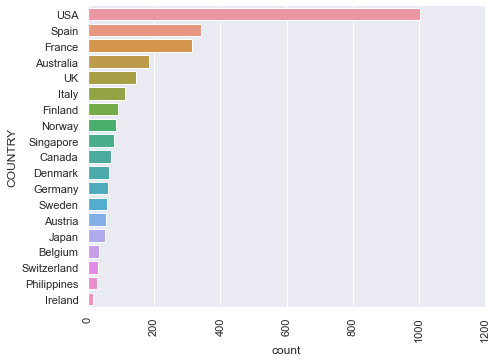

In [60]:
g = sns.catplot(y='COUNTRY', data=df, kind='count', aspect=1.4, order=order_list.index)
g.set_xticklabels(rotation=90, step=1)
plt.show()

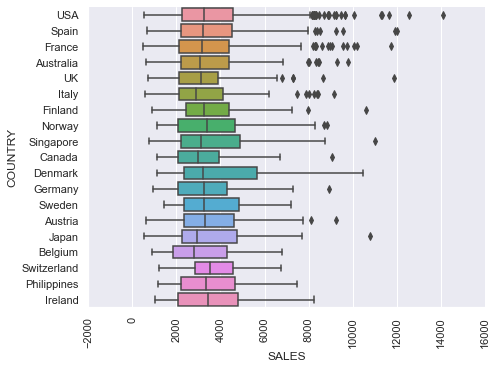

In [61]:
g = sns.catplot(y='COUNTRY', x='SALES', data=df, kind='box', aspect=1.4, order=order_list.index)
g.set_xticklabels(rotation=90, step=1)
plt.show()

#### Categorical Variable Encoding

Identifying Categorical Variables

In [62]:
df[['DEALSIZE', 'PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY', 'STATUS']].nunique()

DEALSIZE         3
PRODUCTLINE      7
PRODUCTCODE    109
COUNTRY         19
STATUS           6
dtype: int64

##### `PRODUCTCODE`

In [63]:
print('PRODUCTCODE unique values:', df.PRODUCTCODE.nunique())
df[['PRODUCTLINE', 'PRODUCTCODE', 'SALES']].groupby(['PRODUCTLINE', 'PRODUCTCODE']).count()

PRODUCTCODE unique values: 109


SALES
PRODUCTLINE  PRODUCTCODE       
Classic Cars 1               28
             4               27
             5               28
             6               25
             7               26
...                         ...
Vintage Cars 75              26
             78              22
             80              26
             89              24
             91              26

[109 rows x 1 columns]

##### `STATUS`

In [64]:
df.STATUS.value_counts(dropna=False)

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [65]:
status_dict = {'Shipped': 2, 'Cancelled': 0, 'On Hold': 0, 'Disputed': 0, 'In Process': 1, 'Resolved': 1}
df['STATUS'].replace(status_dict, inplace=True)

##### `PRODUCTLINE`, `DEALSIZE`, `COUNTRY` (1HE)

Applying one-hot encoding

In [66]:
# Checking pre-encoding shape
df.shape

(2823, 13)

In [67]:
df = pd.get_dummies(df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'])
df.shape

(2823, 39)

### Inspecting Relationships `numeric+categorical(encoded)`

Inspecting columns and indices

In [68]:
for col_index, elem in enumerate(df.columns):
    print(col_index, elem)

0 QUANTITYORDERED
1 PRICEEACH
2 SALES
3 STATUS
4 MONTH_ID
5 YEAR_ID
6 MSRP
7 PRODUCTCODE
8 PRICE_VAR
9 YM_ID
10 PRODUCTLINE_Classic Cars
11 PRODUCTLINE_Motorcycles
12 PRODUCTLINE_Planes
13 PRODUCTLINE_Ships
14 PRODUCTLINE_Trains
15 PRODUCTLINE_Trucks and Buses
16 PRODUCTLINE_Vintage Cars
17 DEALSIZE_Large
18 DEALSIZE_Medium
19 DEALSIZE_Small
20 COUNTRY_Australia
21 COUNTRY_Austria
22 COUNTRY_Belgium
23 COUNTRY_Canada
24 COUNTRY_Denmark
25 COUNTRY_Finland
26 COUNTRY_France
27 COUNTRY_Germany
28 COUNTRY_Ireland
29 COUNTRY_Italy
30 COUNTRY_Japan
31 COUNTRY_Norway
32 COUNTRY_Philippines
33 COUNTRY_Singapore
34 COUNTRY_Spain
35 COUNTRY_Sweden
36 COUNTRY_Switzerland
37 COUNTRY_UK
38 COUNTRY_USA


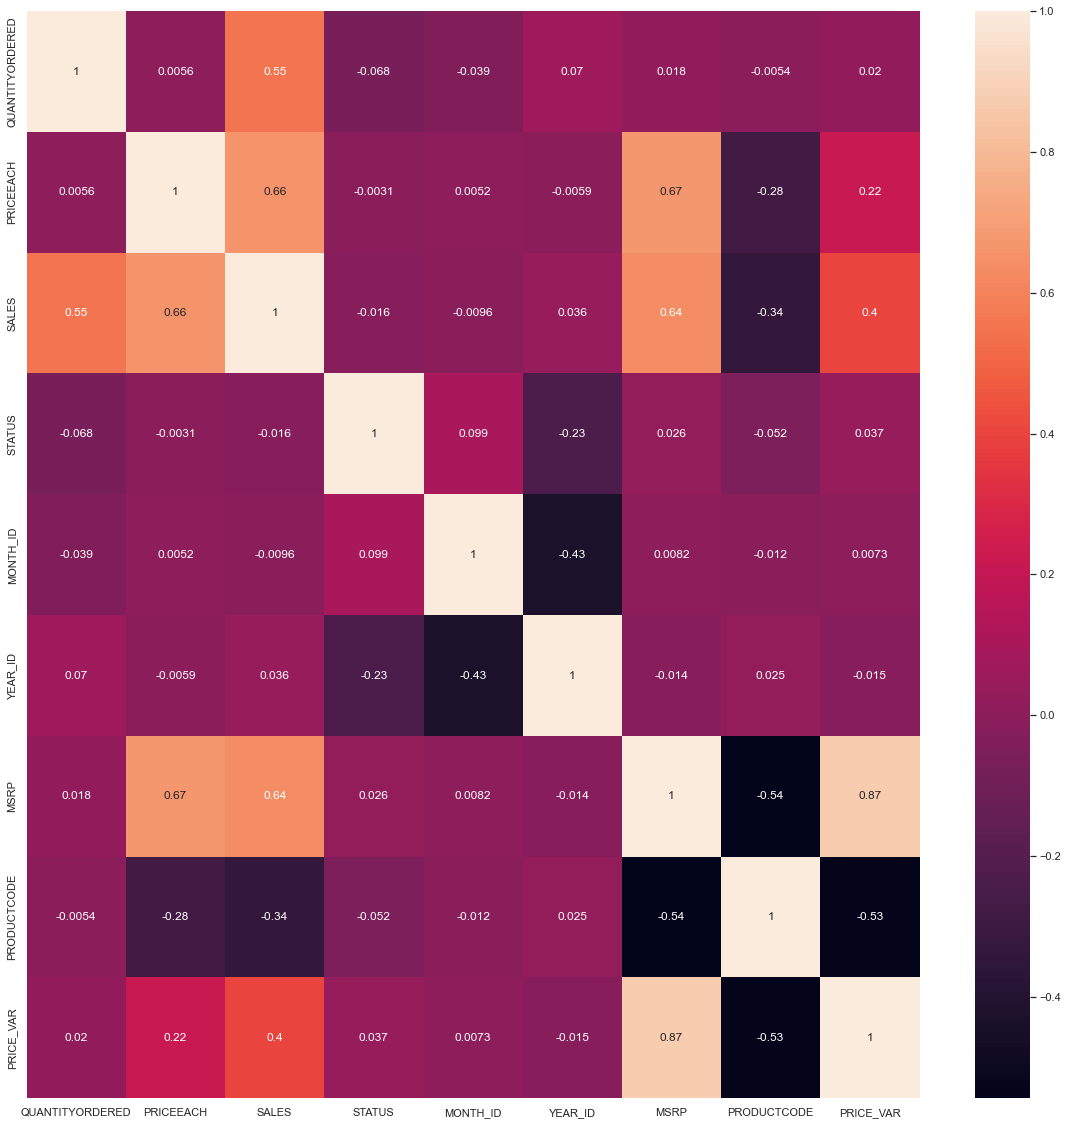

In [69]:
corr_matrix = df.iloc[:, :9].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [70]:
for elem in dir():
    if elem.find('df') > 0:
        print(elem)

corr_df
trend_df


Dropping `PRICE_VAR`, `YM_ID`

In [71]:
df.drop(['PRICE_VAR', 'YM_ID'], axis=1, inplace=True)

## EDA & Data Preparation Results

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   QUANTITYORDERED               2823 non-null   int64  
 1   PRICEEACH                     2823 non-null   float64
 2   SALES                         2823 non-null   float64
 3   STATUS                        2823 non-null   int64  
 4   MONTH_ID                      2823 non-null   int64  
 5   YEAR_ID                       2823 non-null   int64  
 6   MSRP                          2823 non-null   int64  
 7   PRODUCTCODE                   2823 non-null   int8   
 8   PRODUCTLINE_Classic Cars      2823 non-null   uint8  
 9   PRODUCTLINE_Motorcycles       2823 non-null   uint8  
 10  PRODUCTLINE_Planes            2823 non-null   uint8  
 11  PRODUCTLINE_Ships             2823 non-null   uint8  
 12  PRODUCTLINE_Trains            2823 non-null   uint8  
 13  PRO

In [73]:
df.to_feather('sales_data_sample-prepared.feather')

# END